<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

<div style="background-color: #A378AF; border:1px solid #000; margin-left: 2px; margin-right: 2px; 
padding-bottom: 2px; padding-left: 2px; padding-right: 1px; padding-top: 10px;">
<center><b><font size="6">Group Project 2 - Python Project</font></b></center>
</div>

Student Names:

<center><font size = 10>Tyler Norlund & Edwin Ramirez</font></center>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 1:</b> Project Definition</blockquote> 

Select a dataset from the UCI Machine Learning Repository 
http://archive.ics.uci.edu/ml/datasets.html
Your dataset should be different from the one utilized on project 1. 

Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. Explain what is the objective of this project and its justification. What are the findings so far, and what is your objective.

Note: <br>
If you want to select a dataset from a different public repository, you can.


<b><font color="blue" size = 4>a)</font> Data Selection</b>: Explain why this data was selected. What are the overall characteristics of the data.

<span style="background-color: #FFFF00">Your answer here</span>

In this project, we use the [Spotify API](https://developer.spotify.com/). This was done in python using the [Spotipy](https://spotipy.readthedocs.io/en/latest/#) python library. Using python, we obtained Spotify's top playlists and stored each playlist in a CSV format.

In [2]:
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from pandas import DataFrame
from os import listdir
from os.path import isfile, join
from scipy.cluster.hierarchy import fcluster
from mpl_toolkits.mplot3d import Axes3D

song_data_df = pd.read_csv('song_data.csv')
song_info_df = pd.read_csv('song_info.csv')
    

<b><font color="blue" size = 4>b)</font> Stakeholder</b>: Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. 

<span style="background-color: #FFFF00">Your answer here</span>

In this project, Spotify and music producers would be the stakeholders.

<b><font color="blue" size = 4>c)</font> Objective</b>: Project objective, justification, expected outcome. How your results may impact your stake holders. Which decisions or changes will the stakeholder be able to make based on this project

<span style="background-color: #FFFF00">Your answer here</span>

In this project we will classify songs based on the genres the songs belong to. This would help spotify better understand the types of songs people listen to and give Spotify a way to recomend songs. 

<b><font color="blue" size = 4>d)</font> Background Research</b>: List here all other studies related to clustering published with the same dataset, and how your proposed study is different from them.

If no other clustering studies were conducted with the same dataset, you should specify: "No other studies available"

<span style="background-color: #FFFF00">Your answer here</span>

Since we are using the Spotify API to get our own dataset, no other studies are available with this specific dataset. 

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 2:</b> Exploratory Data Analysis</blockquote> 

Create some exploratory analysis on your data using core Python functions and visualizations. Cluster the information into different groups to explore the possibilities for your proposed project. Summarize your data and conduct some statistics. Explain your findings in English.

<b><font color="blue" size = 4>a)</font> Data Summary</b>: Show summary information of the different variables. Select the columns you are interested in. Explain each column, its range and purpose

<span style="background-color: #FFFF00">Your answer here</span>

In [2]:
print("Song Data Columns names: \n")
print(song_data_df.columns.values)
print("Song Info Columns names: \n")
print(song_info_df.columns.values)

Song Data Columns names: 

['song_name' 'song_popularity' 'song_duration_ms' 'acousticness'
 'danceability' 'energy' 'instrumentalness' 'key' 'liveness' 'loudness'
 'audio_mode' 'speechiness' 'tempo' 'time_signature' 'audio_valence']
Song Info Columns names: 

['song_name' 'artist_name' 'album_names' 'playlist']


In [3]:
print(song_data_df.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

We are primarily interested in the numerical data that Spotify stores for each song. Thus, we are not interested in the following attributes in regards to our calculations: date added to playlist, artist name, album names, or album release date. These attributes are self-explanatory, and don't require explanation. 

Below, are the variables we are primarily interested:

**Song Duration (ms)**

Contains data on the length of time the song is in milliseconds

**Acousticness**

A measurement from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents highest confidence the track is acoustic.

**Danceability**

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of type float is returned between 0.0 and 1.0, where 0.0 is least danceable and 1.0 is most danceable.

**Energy**

Energy is a measure of type float that is between 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Energetic tracks can be described as fast, loud, and noisy. For example, death metal has high energy, while a slow jazz would register low on the scale.

**Instrumentalness**

Predicts whether a track contains no vocals by returning a value of type float that is between 0.0 and 1.0. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


**Loudness**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db

**Audio Mode**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Speechiness**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
**Tempo**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Time Signature**

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**Key Signature**

Key signature is represented on a scale, where integers are mapped to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 

**Audio Valence**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


<b><font color="blue" size = 4>b)</font> Data Cleaning</b>: Clean the data, removing rows and columns that have no useful information or no information at all

Our two separate dataframes are now `song_info` and `songs_df`, where `songs_df` contains numerical data for each attriubte, and `song_info` contains the artist, album, and playlist associated with each song.

                                      artist_name  \
song_name                                           
Boulevard of Broken Dreams              Green Day   
In The End                            Linkin Park   
Seven Nation Army               The White Stripes   
By The Way                  Red Hot Chili Peppers   
How You Remind Me                      Nickelback   

                                                   album_names  \
song_name                                                        
Boulevard of Broken Dreams  Greatest Hits: God's Favorite Band   
In The End                                       Hybrid Theory   
Seven Nation Army                                     Elephant   
By The Way                         By The Way (Deluxe Version)   
How You Remind Me                               Silver Side Up   

                                    playlist  
song_name                                     
Boulevard of Broken Dreams  00s Rock Anthems  
In The End              

                           song_popularity song_duration_ms  acousticness  \
song_name                                                                   
Boulevard of Broken Dreams              73           262333      0.005520   
In The End                              66           216933      0.010300   
Seven Nation Army                       76           231733      0.008170   
By The Way                              74           216933      0.026400   
How You Remind Me                       56           223826      0.000954   

                            danceability  energy  instrumentalness key  \
song_name                                                                
Boulevard of Broken Dreams         0.496   0.682          0.000029   8   
In The End                         0.542   0.853          0.000000   3   
Seven Nation Army                  0.737   0.463          0.447000   0   
By The Way                         0.451   0.970          0.003550   0   
How You Remind M

<span style="background-color: #FFFF00">Your answer here</span>

Since we obtained the data ourselves, the python script, `spotify2csv.py`, handled playlists with partial information. Each playlist has all non-null values, except for the column titled "Unnamed: 0", which was simply an extra column that was created during the file saving process. We removed the columns in regards to dates, because it doesn't offer data on the musicality of the songs. 

<b><font color="blue" size = 4>c)</font> Adaptation</b>: Create at least two additional columns that are necessary for your study. They can be calculated columns or aggregated columns.

In [4]:
song_data_df["tempo_vs_dance"] = song_data_df["tempo"]/song_data_df["danceability"]
song_data_df["dance_vs_speech"] = song_data_df["danceability"]/song_data_df["speechiness"]

print(song_data_df.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4     

<span style="background-color: #FFFF00">Your answer here</span>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 3:</b> Visualization with MatPlotLib</blockquote> 

<b><font color="blue" size = 4>a)</font> Descriptive Analytics</b>: Create at least 5 different (unique) visualizations that show different aspects of your data related to the research object of your project

<span style="background-color: #FFFF00">Your answer here</span>

**2D Histogram - Energy vs. Liveness**

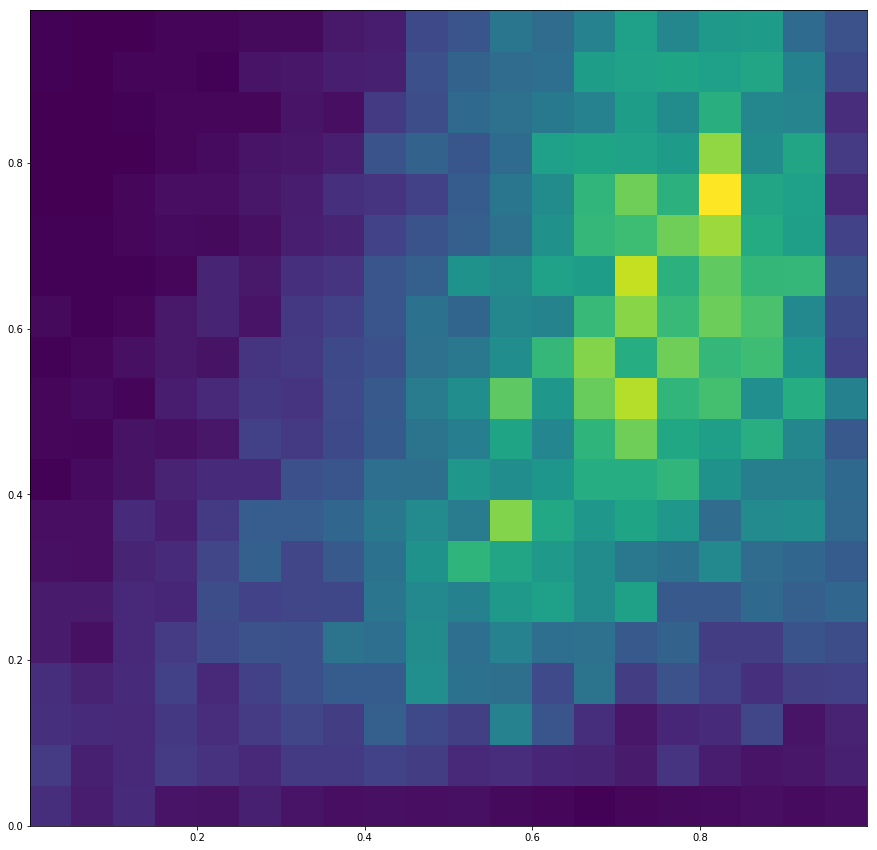

In [30]:
fig, ax = plt.subplots(figsize = (15,15))
hist = ax.hist2d(song_data_df['energy'], song_data_df['audio_valence'], bins=20)

**Scatter Plot - Danceability vs. Speechiness**

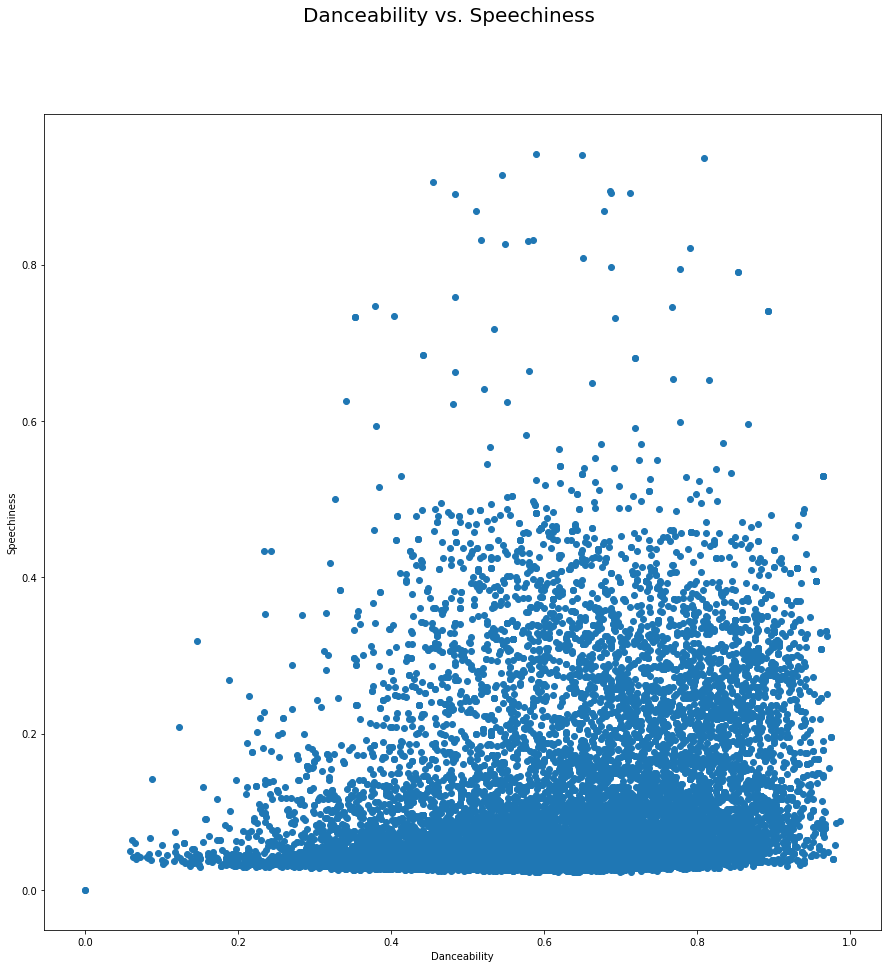

In [10]:
fig, ax = plt.subplots(figsize = (15,15))
plt.scatter(song_data_df['danceability'], song_data_df['speechiness'])
plt.suptitle('Danceability vs. Speechiness', fontsize = 20)
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.show()

**Scatter Plot - Energy vs. Speechiness**

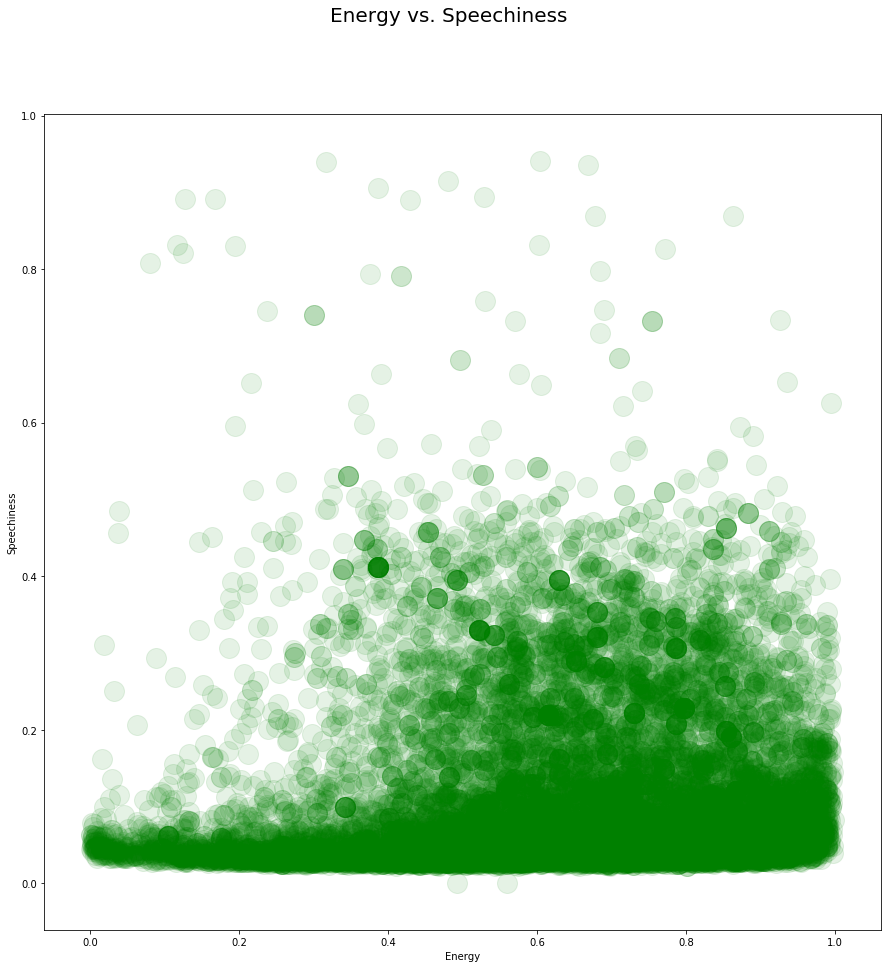

In [17]:
fig, ax = plt.subplots(figsize = (15,15))
plt.scatter(song_data_df['energy'], song_data_df['speechiness'], color='g', alpha=0.1, s=400)
plt.suptitle('Energy vs. Speechiness', fontsize = 20)
plt.xlabel('Energy')
plt.ylabel('Speechiness')
plt.show()

Min Audio Valence 0.0
Max Audio Valence 0.984
Mean Audio Valence 0.527966875497741
90-100: 1388
80-90: 1768
70-80: 2131
60-70: 2314
50-60: 2516
40-50: 2392
30-40: 2386
20-30: 1968
10-20: 1389
0-10 : 583


(-1.2639101100465204,
 1.1078052433355485,
 -1.2185151029778534,
 1.2177548957143762)

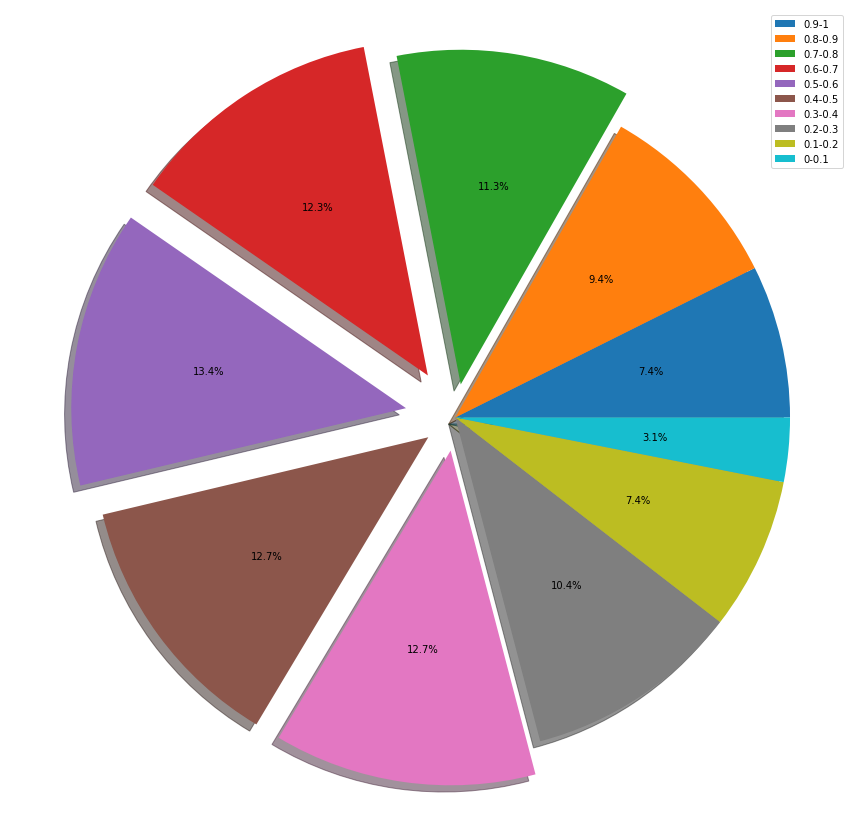

In [20]:
fig, ax = plt.subplots(figsize = (15,15))
min_valence = min(song_data_df['audio_valence']);
max_valence = max(song_data_df['audio_valence']);
mean_valence = song_data_df['audio_valence'].mean();

p90_100 = len(song_data_df[(song_data_df['audio_valence'] >= 0.9)])
p80_90 = len(song_data_df[(song_data_df['audio_valence'] >= 0.8) & (song_data_df['audio_valence'] < 0.9)])
p70_80 = len(song_data_df[(song_data_df['audio_valence'] >= 0.7) & (song_data_df['audio_valence'] < 0.8)])
p60_70 = len(song_data_df[(song_data_df['audio_valence'] >= 0.6) & (song_data_df['audio_valence'] < 0.7)])
p50_60 = len(song_data_df[(song_data_df['audio_valence'] >= 0.5) & (song_data_df['audio_valence'] < 0.6)])
p40_50 = len(song_data_df[(song_data_df['audio_valence'] >= 0.4) & (song_data_df['audio_valence'] < 0.5)])
p30_40 = len(song_data_df[(song_data_df['audio_valence'] >= 0.3) & (song_data_df['audio_valence'] < 0.4)])
p20_30 = len(song_data_df[(song_data_df['audio_valence'] >= 0.2) & (song_data_df['audio_valence'] < 0.3)])
p10_20 = len(song_data_df[(song_data_df['audio_valence'] >= 0.1) & (song_data_df['audio_valence'] < 0.2)])
p00_10 = len(song_data_df[(song_data_df['audio_valence'] >= 0) & (song_data_df['audio_valence'] < 0.1)])


print("Min Audio Valence", min_valence)
print("Max Audio Valence", max_valence)
print("Mean Audio Valence", mean_valence)
print("90-100:", p90_100)
print("80-90:", p80_90)
print("70-80:", p70_80)
print("60-70:", p60_70)
print("50-60:", p50_60)
print("40-50:", p40_50)
print("30-40:", p30_40)
print("20-30:", p20_30)
print("10-20:", p10_20)
print("0-10 :", p00_10)

sizes = [p90_100, p80_90, p70_80, p60_70, p50_60, p40_50, p30_40, p20_30, p10_20, p00_10]
labels = '0.9-1', '0.8-0.9', '0.7-0.8', '0.6-0.7', '0.5-0.6', '0.4-0.5', '0.3-0.4', '0.2-0.3', '0.1-0.2', '0-0.1'
explode = (0, 0, 0.1, 0.15, 0.15, 0.1, 0.1, 0, 0, 0)

patches, texts, _ = plt.pie(sizes, explode = explode, autopct='%1.1f%%', shadow=True)
plt.legend(patches, labels, loc="best")
plt.axis('equal')

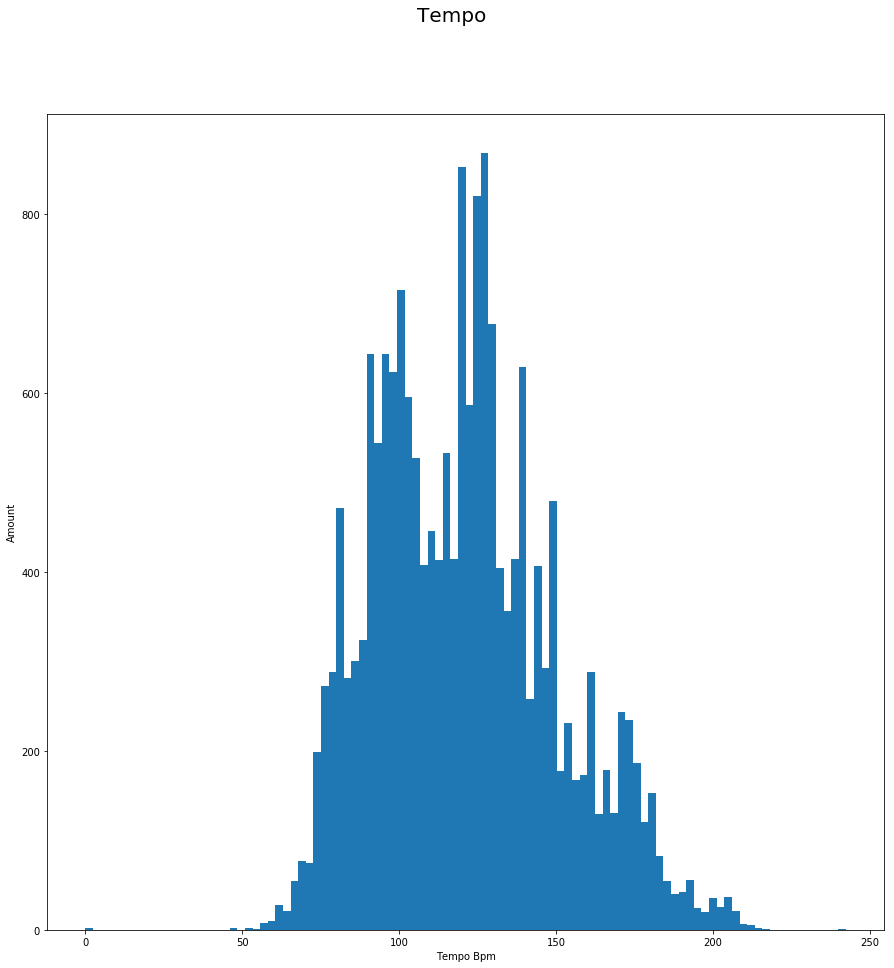

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
plt.hist(song_data_df['tempo'], bins=100)
plt.suptitle('Tempo', fontsize = 20)
plt.xlabel('Tempo Bpm')
plt.ylabel('Amount')
plt.show()

<b><font color="blue" size = 4>b)</font> Outcome</b>: Explain in words the outcome of your descriptive analysis

<span style="background-color: #FFFF00">Your answer here</span>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 4:</b> Clustering</blockquote> 

Select a number of numerical columns to be used for your clustering algorithms. Explain the business logic of your clustering. Select expected number of clustering to explore.

<b><font color="blue" size = 4>a)</font>  Cluster Analysis</b>: Explain the business reason for your selection of the number of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

<b><font color="blue" size = 4>b)</font> k-Means</b>: Cluster your data using k-means. Explain your results. Try two different schemas of clusters.

**Dendrogram of 30 random songs: Categorized based on Danceability, Speechiness, and Audio Valence**

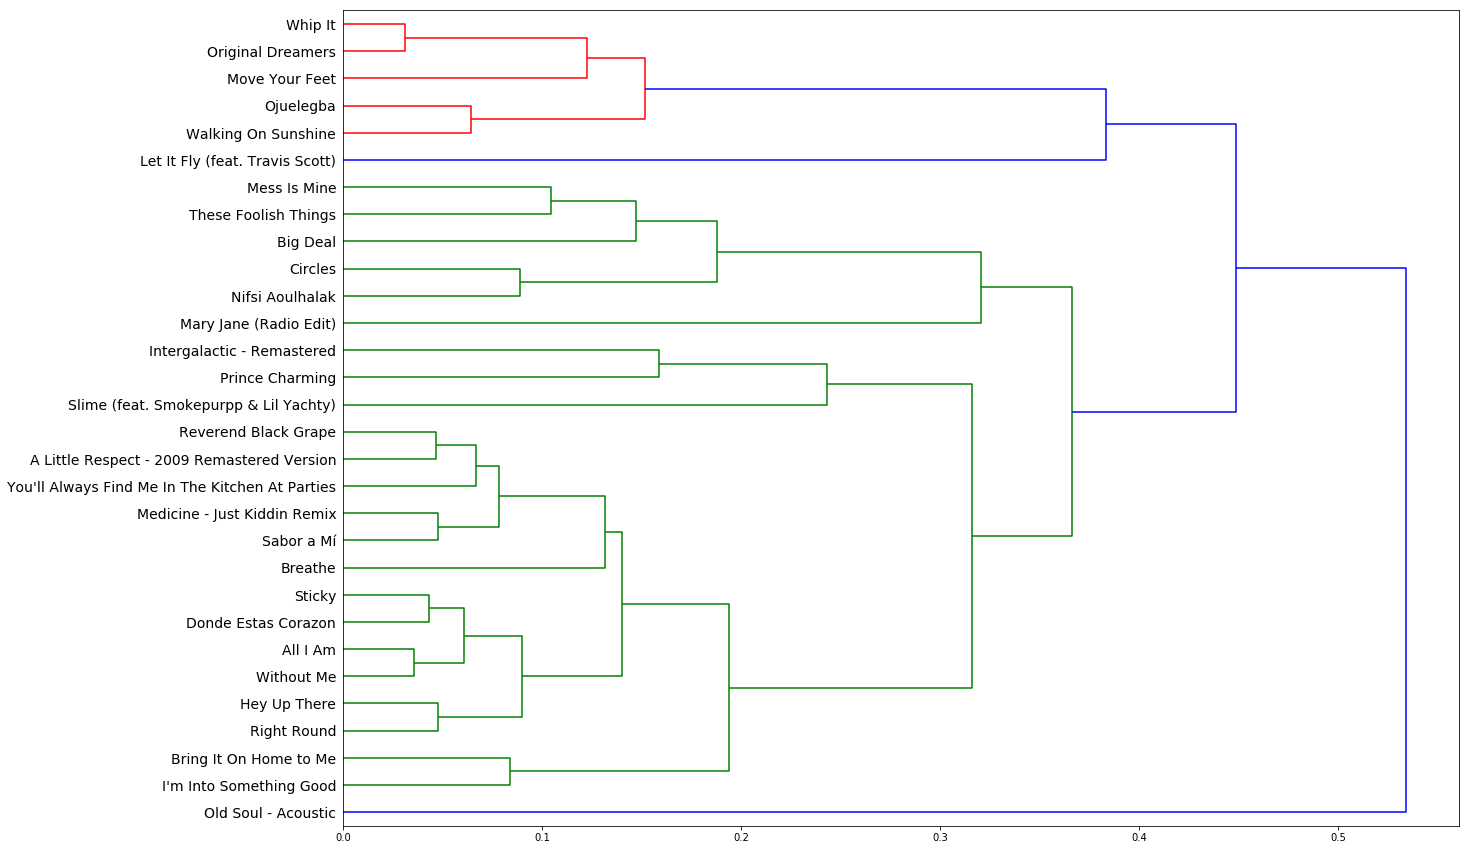

In [30]:
#Sample 30 random songs
sample_df = songs_df.sample(n = 30)
sample_df = sample_df[["danceability", "speechiness", "audio_valence"]]
Z = linkage(sample_df, 'average')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 14, labels = sample_df.index)

<span style="background-color: #FFFF00">Your answer here</span>

**3D Plot: Danceability vs. Speechiness vs. Audio Valence**

In [31]:
model = KMeans(n_clusters = 5)
model.fit(sample_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'Audio Valence')

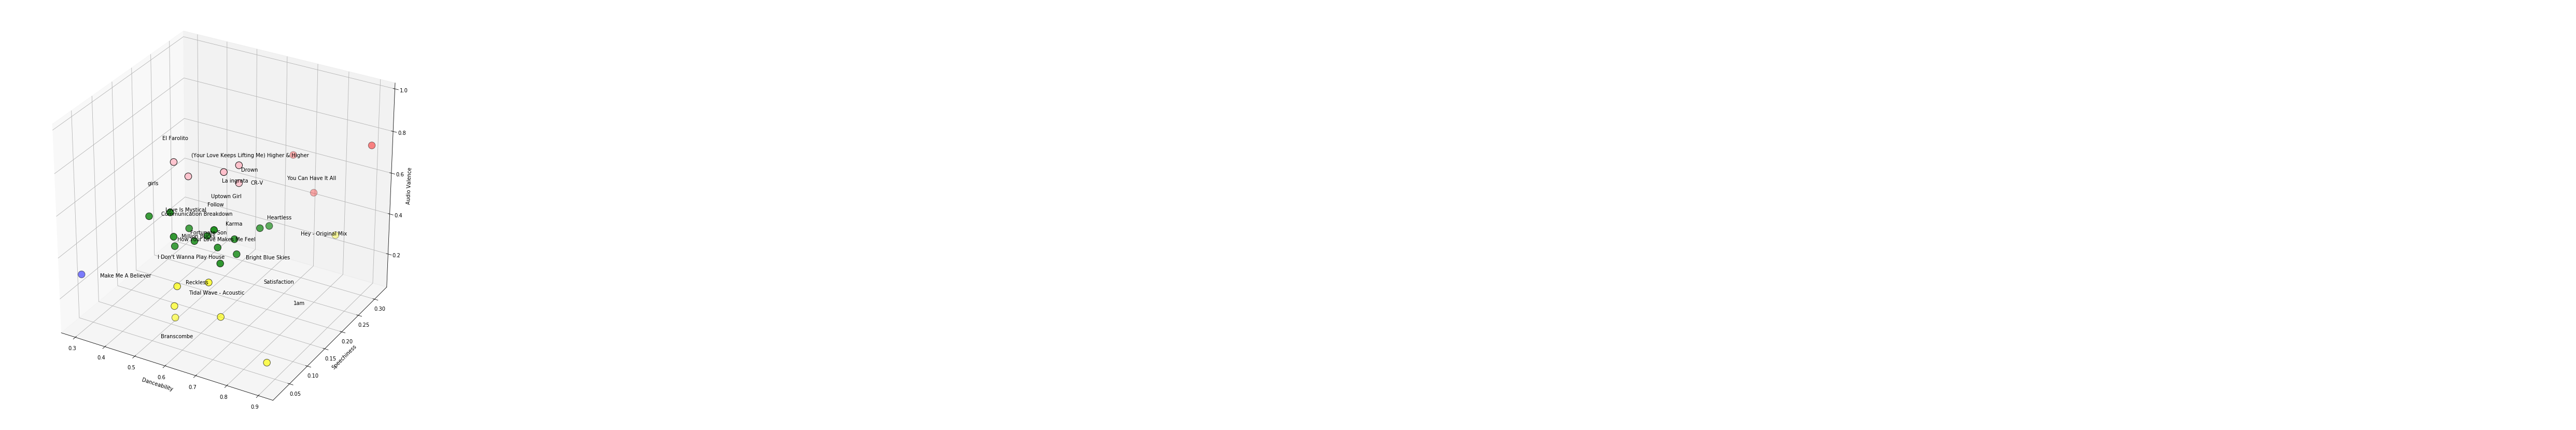

In [33]:
colormap = np.array(['red', 'green', 'blue', "yellow", "pink"])

#size of plot
fig1 = plt.figure(figsize = (15,15))
ax = fig1.add_subplot(111, projection = '3d')

ax.scatter(xs = sample_df.danceability, ys = sample_df.speechiness, zs = sample_df.audio_valence, c = colormap[model.labels_] , cmap = 'viridis', s = 180, edgecolor = 'black', depthshade = True)

for value, dance, speech, valence in sample1[['danceability', 'speechiness', 'audio_valence']].itertuples(index = True, name = None):
    ax.text(dance, speech, valence + 0.02, value)
    
ax.set_xlabel("Danceability")
ax.set_ylabel("Speechiness")
ax.set_zlabel("Audio Valence")

<b><font color="blue" size = 4>c)</font> Hierarchical Clustering</b>: Cluster your data using hierarchical clustering. Explain your results. Try two different schemas of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

<b><font color="blue" size = 4>d)</font> kNN Clustering</b>: Use your results from the cluster analysis performed in a) or b) and create a short training set. Cluster your data using your training set on kNN. Explain your results.

<span style="background-color: #FFFF00">Your answer here</span>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 5:</b> Summary</blockquote> 

<b><font color="blue" size = 4>a)</font> Project Summary</b>: Write a few sentences about the result of this project. How can your stakeholder benefit from the results of your project? Which changes or adaptations can your stakehoders make now that he has your results?

<span style="background-color: #FFFF00">Your answer here</span>

<b><font color="blue" size = 4>b)</font> Project Report</b>: Write a formal report to your stakeholders with the summary of your report 

<span style="background-color: #FFFF00">Your answer here</span>